# Trayectorias
## Integrantes: 
### Miguel Murcia, Luis Escobar, Eliecer Rodriguez

In [2]:
from roboticstoolbox import DHRobot
import time
import roboticstoolbox as rtb
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from spatialmath import *     

### Importar el Robot

In [11]:
from BrazoRobotico import BrazoRobotico
Robot=BrazoRobotico()

ModuleNotFoundError: No module named 'BrazoRobotico'

In [4]:
print(Robot)

┌───┬───────────┬───────────┬───────────────┬────────────────────────────────┐
│id │   link    │  parent   │     joint     │              ETS               │
├───┼───────────┼───────────┼───────────────┼────────────────────────────────┤
│ 0 │     world │         - │               │                                │
│ 1 │ base_link │     world │          Join │                                │
│ 2 │    link_1 │ base_link │       joint_1 │ tz(0.75) * Rz(q0)              │
│ 3 │    link_2 │    link_1 │       joint_2 │ tz(0.55) * Rz(89.95°) * Ry(q1) │
│ 4 │    link_3 │    link_2 │       joint_3 │ tz(1.2) * Ry(q2)               │
│ 5 │    link_4 │    link_3 │       joint_4 │ tz(1.0) * Ry(q3)               │
│ 6 │  @Gripper │    link_4 │ joint_Gripper │ tz(0.7) * Rz(89.95°) * Rz(q4)  │
└───┴───────────┴───────────┴───────────────┴────────────────────────────────┘

┌─────┬──────┬──────┬──────┬──────┬──────┐
│name │ q0   │ q1   │ q2   │ q3   │ q4   │
├─────┼──────┼──────┼──────┼──────┼──────┤
│

In [5]:
print(Robot.links)

[ELink(world, ets=), ELink(base_link, ets=, parent=world), ELink(link_1, ets=tz(0.75) * Rz(q), parent=base_link, qlim=[-1.57, 1.57]), ELink(link_2, ets=tz(0.55) * Rz(89.95°) * Ry(q), parent=link_1, qlim=[-1.57, 1.57]), ELink(link_3, ets=tz(1.2) * Ry(q), parent=link_2, qlim=[-1.57, 1.57]), ELink(link_4, ets=tz(1.0) * Ry(q), parent=link_3, qlim=[-1.57, 1.57]), ELink(Gripper, ets=tz(0.7) * Rz(89.95°) * Rz(q), parent=link_4, qlim=[-1.57, 1.57])]


In [6]:
Robot.plot(Robot.qr,backend='swift',block=False)

# Brazo robotico


# 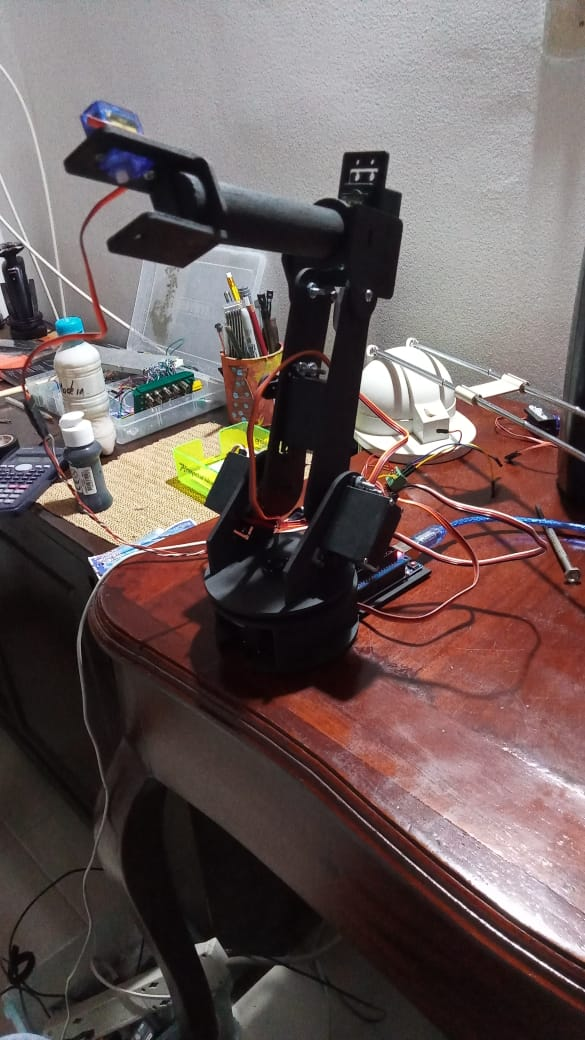


## Describir la trayectoria deseada del gripper para que el realice la letra L

In [6]:
P1=SE3(x=100,y=300,z=520)
P2=SE3(x=100,y=300,z=100)
P3=SE3(x=180,y=300,z=100)


In [7]:
TrayCart1=rtb.ctraj(P1, P2, 100)
TrayCart2=rtb.ctraj(P2, P3, 100)


### Visualizar las trayectorias Cartesianas

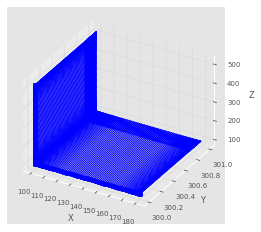

In [8]:
TrayCart1.plot()
TrayCart2.plot()


### Animación del robot haciendo las trayectorias
### Debemos pasar nuestras coordenadas de mm a cm, y usar nuevamente el método ctraj, para calcular las trayectorias cartesianas.

In [9]:
P1=SE3(x=1.0,y=3.0,z=5.2)
P2=SE3(x=1.0,y=3.0,z=1.0)
P3=SE3(x=1.8,y=3.0,z=1.0)

TrayC1=rtb.ctraj(P1, P2, 50)
TrayC2=rtb.ctraj(P2, P3, 50)


### Ya teniendo las trayectorias cartesianas, calculamos la cinemática inversa, esto con el fin de obtener los valores que debe tomar cada articulación. 

In [10]:
InvTrayC1=Robot.ikine_min(TrayC1)
InvTrayC2=Robot.ikine_min(TrayC2)


NameError: name 'Robot' is not defined

In [22]:
print(InvTrayC2)

[IKsolution(q=array([-3.20954227e-01,  7.72711735e-01, -1.52225645e-08, -7.13719266e-01,
       -2.81904578e+00]), success=True, reason='Optimization terminated successfully', iterations=19, residual=0.29581282118073615), IKsolution(q=array([-3.27406288e-01,  7.70740050e-01, -2.77234281e-08, -7.11421792e-01,
       -2.81259372e+00]), success=True, reason='Optimization terminated successfully', iterations=17, residual=0.30066505085202583), IKsolution(q=array([-3.46591748e-01,  7.65044884e-01, -1.75834845e-08, -7.04735577e-01,
       -2.79340826e+00]), success=True, reason='Optimization terminated successfully', iterations=15, residual=0.3156308634187003), IKsolution(q=array([-3.77979466e-01,  7.56257966e-01,  3.80682632e-08, -6.94252384e-01,
       -2.76202054e+00]), success=True, reason='Optimization terminated successfully', iterations=16, residual=0.34195720516273853), IKsolution(q=array([-4.20630852e-01,  7.45340053e-01,  9.56923891e-10, -6.80870358e-01,
       -2.71936916e+00]), su

In [23]:
TrayAr1 = rtb.jtraj(InvTrayC1[0].q, InvTrayC1[-1].q, 100)
TrayAr2 = rtb.jtraj(InvTrayC2[0].q, InvTrayC2[-1].q, 100)


### Animación del robot

In [31]:
Robot.plot(TrayAr1.y,block=False)
time.sleep(1.9)

Robot.plot(TrayAr2.y,block=False)
time.sleep(1.9)
